# <center> <span style="color:lightblue">**Random Forest**</span>


In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import make_classification
import random
%matplotlib inline

In [111]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)


In [112]:
df=pd.DataFrame(X,columns=["col1","col2","col3","col4","col5"])
df["target"]=y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.672219,-0.381016,2.655457,-2.274657,-0.917875,0
1,-0.418848,1.206155,0.641942,-3.099733,0.202696,0
2,-0.042249,0.507908,0.052737,-1.927339,-0.539592,1
3,-1.599208,0.821214,0.967778,1.088043,-0.408051,1
4,-0.815010,-0.613448,0.095166,-0.123838,0.227451,0


In [113]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [114]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [115]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [116]:
df1 = sample_rows(df,0.1)

In [117]:
df2 = sample_rows(df,0.1)

In [118]:
df3 = sample_rows(df,0.1)

In [119]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')


In [120]:
df3

,col1,col2,col3,col4,col5,target
37,0.547800,-0.729905,-0.711232,1.992197,-0.597406,1
6,-1.796276,-3.091732,1.860965,0.414511,-1.920411,0
14,-1.236955,-2.107380,1.544642,-0.147295,-1.409666,0
57,1.332787,-1.739709,-1.211494,1.970378,-1.367425,1
94,1.702296,-1.040750,-1.550263,1.457094,-0.185657,1
63,0.282253,-0.812065,0.408918,-0.488352,-1.363724,1
79,0.769025,-4.241158,3.545648,2.409876,-1.440452,0
50,2.930294,-1.491993,-2.354209,1.398380,-1.010453,1
36,1.150904,-0.974889,0.020859,0.011366,-0.677671,1
22,3.046372,-1.302593,0.007020,-2.105788,-1.080032,1


In [121]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [122]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [123]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.237\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.5, 'x[1] <= -0.145\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

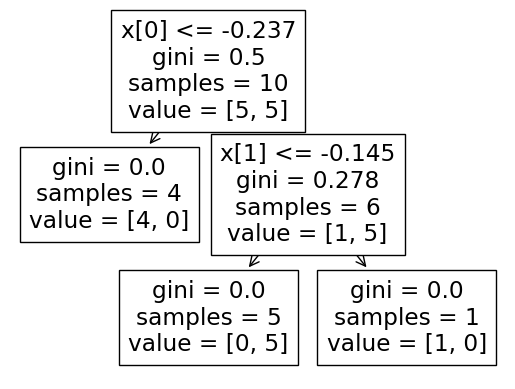

In [124]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.875, 'x[0] <= 0.255\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.5, 0.625, 'x[0] <= -1.67\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= -1.496\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

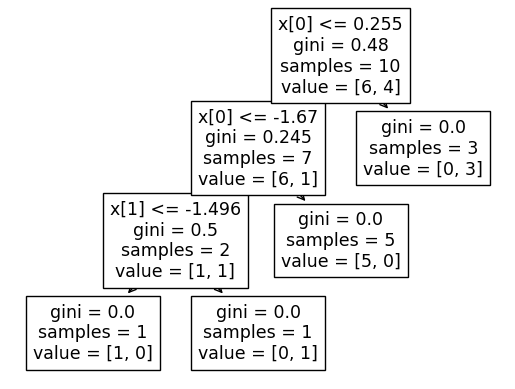

In [125]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[1] <= -1.924\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

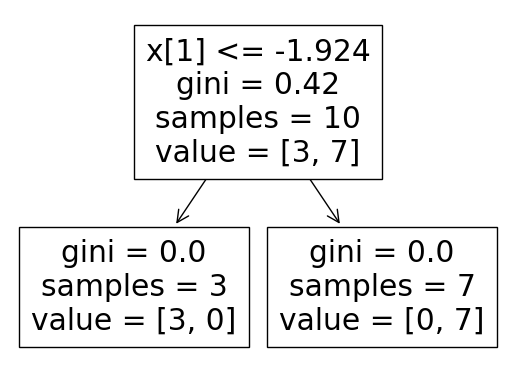

In [126]:
plot_tree(clf3)

In [127]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([0])

In [128]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([0])

In [129]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([1])

In [130]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
4,-0.815010,-0.613448,0.095166,-0.123838,0.227451,0
66,0.723564,-1.081829,-0.793819,2.497187,-0.732582,1
99,2.956433,-1.678071,-0.346073,-2.416593,-2.010414,1
14,-1.236955,-2.107380,1.544642,-0.147295,-1.409666,0
49,-0.347351,-0.879594,1.171781,-1.189411,-2.016476,0
72,-2.136398,-1.481512,2.065768,-2.673382,-2.161086,0
43,-2.102778,-2.526336,1.511626,0.398076,0.516229,0
80,2.939554,-2.386168,-3.340485,2.131717,-1.666816,1
12,0.812694,-0.542484,1.921801,-3.072232,-1.423197,1
44,-1.869063,1.552075,-1.395228,-2.272873,1.199168,0


# sample features

In [142]:
sample_features(df,0.5)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9684\3275485051.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,col4,col1,target
0,-2.274657,0.672219,0
1,-3.099733,-0.418848,0
2,-1.927339,-0.042249,1
3,1.088043,-1.599208,1
4,-0.123838,-0.815010,0
...,...,...,...
95,-1.062843,-3.307463,0
96,-1.097141,0.186337,0
97,0.023983,1.202256,1
98,0.665629,-0.281441,1


In [132]:
df1_features=sample_features(df,0.5)
df2_features=sample_features(df,0.5)
df3_features=sample_features(df,0.5)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9684\3275485051.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ACER\AppData\Local\Temp\ipykernel_9684\3275485051.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ACER\AppData\Local\Temp\ipykernel_9684\3275485051.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [133]:
print(df1_features.columns)
print(df2_features.columns)
print(df3_features.columns)

Index(['col1', 'col3', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')
Index(['col5', 'col2', 'target'], dtype='object')


In [134]:
clf1_features = DecisionTreeClassifier()
clf2_features = DecisionTreeClassifier()
clf3_features = DecisionTreeClassifier()

In [135]:
clf1_features.fit(df1_features.iloc[:,0:2],df1_features.iloc[:,-1])
clf2_features.fit(df2_features.iloc[:,0:2],df2_features.iloc[:,-1])
clf3_features.fit(df3_features.iloc[:,0:2],df3_features.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.36666666666666664, 0.95, 'x[0] <= 0.274\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2, 0.85, 'x[1] <= 1.226\ngini = 0.306\nsamples = 53\nvalue = [43, 10]'),
 Text(0.13333333333333333, 0.75, 'x[0] <= -1.775\ngini = 0.408\nsamples = 35\nvalue = [25, 10]'),
 Text(0.06666666666666667, 0.65, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.2, 0.65, 'x[0] <= -1.663\ngini = 0.452\nsamples = 29\nvalue = [19, 10]'),
 Text(0.13333333333333333, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.26666666666666666, 0.55, 'x[1] <= 0.922\ngini = 0.393\nsamples = 26\nvalue = [19, 7]'),
 Text(0.13333333333333333, 0.45, 'x[0] <= -0.388\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(0.06666666666666667, 0.35, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.2, 0.35, 'x[1] <= -0.399\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.13333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.26666666666666666, 0.25, 'x[0] <= -0.002\ngini = 0.37

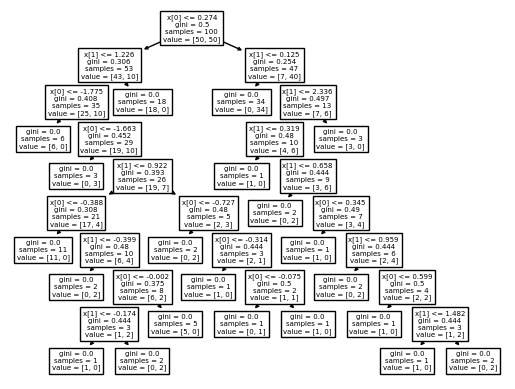

In [136]:
plot_tree(clf1_features)

[Text(0.4666666666666667, 0.95, 'x[0] <= 0.274\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2, 0.85, 'x[1] <= -0.401\ngini = 0.306\nsamples = 53\nvalue = [43, 10]'),
 Text(0.13333333333333333, 0.75, 'x[1] <= -1.584\ngini = 0.43\nsamples = 32\nvalue = [22, 10]'),
 Text(0.06666666666666667, 0.65, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.2, 0.65, 'x[1] <= -0.555\ngini = 0.484\nsamples = 17\nvalue = [7, 10]'),
 Text(0.13333333333333333, 0.55, 'x[0] <= -2.494\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.06666666666666667, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.45, 'x[0] <= -1.619\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(0.13333333333333333, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.26666666666666666, 0.35, 'x[0] <= -0.37\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.13333333333333333, 0.25, 'x[1] <= -0.666\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.06666666666666667, 0.15, 'gini = 0.0\nsa

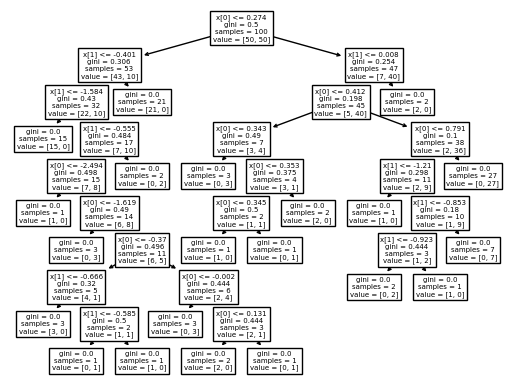

In [137]:
plot_tree(clf2_features)

[Text(0.5964673913043478, 0.9545454545454546, 'x[0] <= -0.013\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5529891304347826, 0.8636363636363636, 'x[0] <= -1.747\ngini = 0.472\nsamples = 81\nvalue = [31, 50]'),
 Text(0.41847826086956524, 0.7727272727272727, 'x[0] <= -2.013\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.375, 0.6818181818181818, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.46195652173913043, 0.6818181818181818, 'x[0] <= -1.965\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.41847826086956524, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5054347826086957, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6875, 0.7727272727272727, 'x[1] <= -2.409\ngini = 0.382\nsamples = 66\nvalue = [17, 49]'),
 Text(0.6440217391304348, 0.6818181818181818, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7309782608695652, 0.6818181818181818, 'x[0] <= -0.401\ngini = 0.316\nsamples = 61\nvalue = [12, 49]'),

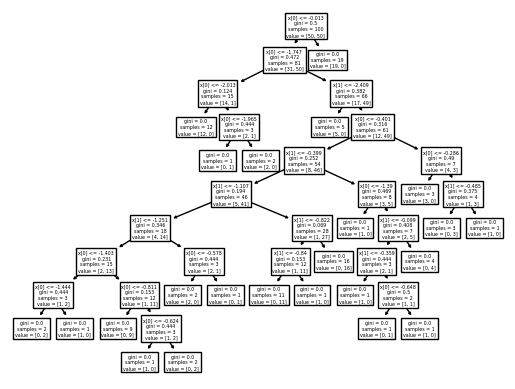

In [138]:
plot_tree(clf3_features)

In [148]:
clf1_features.predict(np.array([-2.274657,	0.672219	]).reshape(1,2)) # target=0

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([0])

In [149]:
clf2_features.predict(np.array([-2.274657,	0.672219	]).reshape(1,2)) # target=0

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([0])

In [150]:
clf3_features.predict(np.array([-2.274657,	0.672219	]).reshape(1,2)) # target=0

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([0])

# combined sampling

In [151]:
combined_sampling(df,0.5,0.5)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9684\3275485051.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,col5,col2,target
1,0.202696,1.206155,0
16,-0.609007,-0.244976,0
91,1.284903,-2.706455,0
85,-0.626693,-0.497511,1
56,-0.787991,-1.079153,1
86,-1.165120,-2.730004,0
59,0.117307,0.235020,0
16,-0.609007,-0.244976,0
45,-1.512736,-0.818636,1
20,-0.101815,-0.860021,1
